# Mobile Price Classification Using Bagging Classifier

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [4]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['price_range']

In [7]:
# Checking for missing values
missing_values = X.isnull().sum().sum()
print("Number of missing values in the dataset:",missing_values)

Number of missing values in the dataset: 0


In [8]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(1600, 20)

In [11]:
X_test.shape

(400, 20)

## Finding the Best Parameters Using Halving Grid Search

In [12]:
base_estimator = DecisionTreeClassifier(random_state=42)
model = BaggingClassifier(estimator=base_estimator, random_state=42)

In [42]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100],
    'max_samples': [0.25, 0.5, 0.75, 1.0, 2.0],
    'max_features': [0.25, 0.5, 0.75, 1.0, 2.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [43]:
halving_search = HalvingGridSearchCV(estimator=model,
                                     param_grid=param_grid,
                                     cv=5,
                                     factor=3,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 40
max_resources_: 1600
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 600
n_resources: 40
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\utils\validation.py", line 69, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_par

----------
iter: 1
n_candidates: 200
n_resources: 120
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [0.45       0.45       0.4        0.45       0.45       0.4
 0.35       0.5        0.55       0.4        0.575      0.6
 0.525      0.5        0.475      0.475      0.475      0.575
 0.4        0.475      0.425      0.425      0.55       0.55
        nan        nan        nan        nan        nan        nan
 0.4        0.5        0.5        0.45       0.475      0.45
 0.425      0.6        0.625      0.575      0.6        0.5
 0.55       0.7        0.75       0.65       0.675      0.625
 0.525      0.7        0.675      0.65       0.65       0.7
        nan        nan        nan        nan        nan        nan
 0.45       0.625      0.475      0.525      0.55       0.525
 0.6        0.775      0.625      0.675      0.675      0.65
 0.675      0.725      0.625      0.65       0.725      0.65
 0.675      0.7        0.7        0.675      0.675      0.65
      

----------
iter: 2
n_candidates: 67
n_resources: 360
Fitting 5 folds for each of 67 candidates, totalling 335 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [0.45       0.45       0.4        0.45       0.45       0.4
 0.35       0.5        0.55       0.4        0.575      0.6
 0.525      0.5        0.475      0.475      0.475      0.575
 0.4        0.475      0.425      0.425      0.55       0.55
        nan        nan        nan        nan        nan        nan
 0.4        0.5        0.5        0.45       0.475      0.45
 0.425      0.6        0.625      0.575      0.6        0.5
 0.55       0.7        0.75       0.65       0.675      0.625
 0.525      0.7        0.675      0.65       0.65       0.7
        nan        nan        nan        nan        nan        nan
 0.45       0.625      0.475      0.525      0.55       0.525
 0.6        0.775      0.625      0.675      0.675      0.65
 0.675      0.725      0.625      0.65       0.725      0.65
 0.675      0.7        0.7        0.675      0.675      0.65
      

----------
iter: 3
n_candidates: 23
n_resources: 1080
Fitting 5 folds for each of 23 candidates, totalling 115 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [0.45       0.45       0.4        0.45       0.45       0.4
 0.35       0.5        0.55       0.4        0.575      0.6
 0.525      0.5        0.475      0.475      0.475      0.575
 0.4        0.475      0.425      0.425      0.55       0.55
        nan        nan        nan        nan        nan        nan
 0.4        0.5        0.5        0.45       0.475      0.45
 0.425      0.6        0.625      0.575      0.6        0.5
 0.55       0.7        0.75       0.65       0.675      0.625
 0.525      0.7        0.675      0.65       0.65       0.7
        nan        nan        nan        nan        nan        nan
 0.45       0.625      0.475      0.525      0.55       0.525
 0.6        0.775      0.625      0.675      0.675      0.65
 0.675      0.725      0.625      0.65       0.725      0.65
 0.675      0.7        0.7        0.675      0.675      0.65
      

HalvingGridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                random_state=42),
                    n_jobs=-1,
                    param_grid={'bootstrap': [True, False],
                                'bootstrap_features': [True, False],
                                'max_features': [0.25, 0.5, 0.75, 1.0, 2.0],
                                'max_samples': [0.25, 0.5, 0.75, 1.0, 2.0],
                                'n_estimators': [10, 20, 30, 40, 50, 100]},
                    verbose=3)

In [44]:
# Best parameters found by HalvingGridSearchCV
print("Best parameters found:", halving_search.best_params_)

Best parameters found: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


### Visualizing the Results

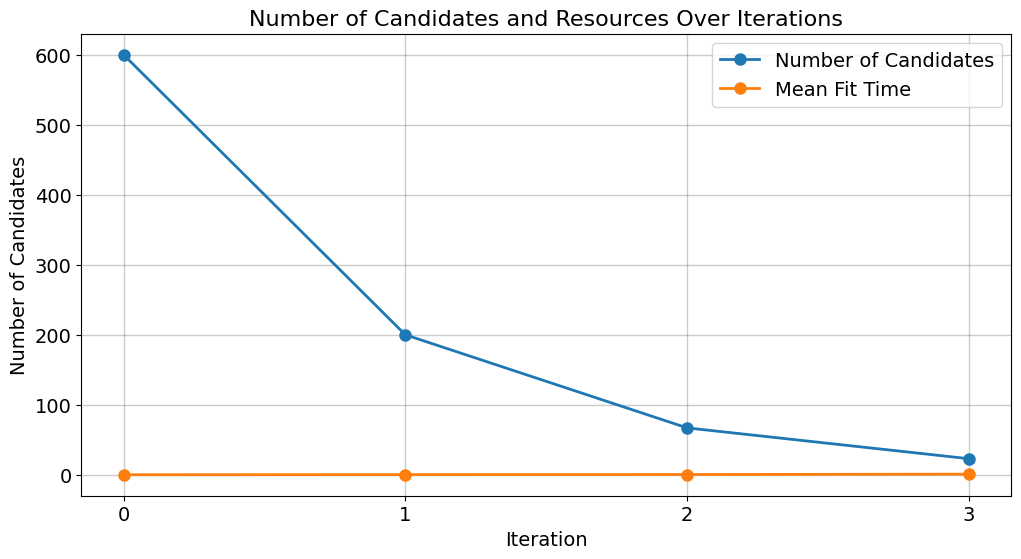

In [45]:
results = pd.DataFrame(halving_search.cv_results_)

iterations = results['iter'].values
n_candidates = results.groupby('iter').size()
mean_fit_time = results.groupby('iter')['mean_fit_time'].mean()

# Visualizing the number of candidates and resources over iterations
plt.figure(figsize=(12, 6))
plt.plot(n_candidates.index, n_candidates.values, marker='o', label='Number of Candidates', linewidth=2, markersize=8)
plt.plot(mean_fit_time.index, mean_fit_time.values, marker='o', label='Mean Fit Time', linewidth=2, markersize=8)
plt.xlabel('Iteration', color='black', fontsize=14)
plt.ylabel('Number of Candidates', color='black', fontsize=14)
plt.title('Number of Candidates and Resources Over Iterations', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(ticks=n_candidates.index)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

Top 10 Parameter Combinations:
Parmeter Combination 1
{'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.75, 'max_samples': 0.5, 'n_estimators': 30}

Parmeter Combination 2
{'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 50}

Parmeter Combination 3
{'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 100}

Parmeter Combination 4
{'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}

Parmeter Combination 5
{'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 50}

Parmeter Combination 6
{'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 10}

Parmeter Combination 7
{'bootstrap': False, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 40}

Parmeter Combination 8

d:\Python\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


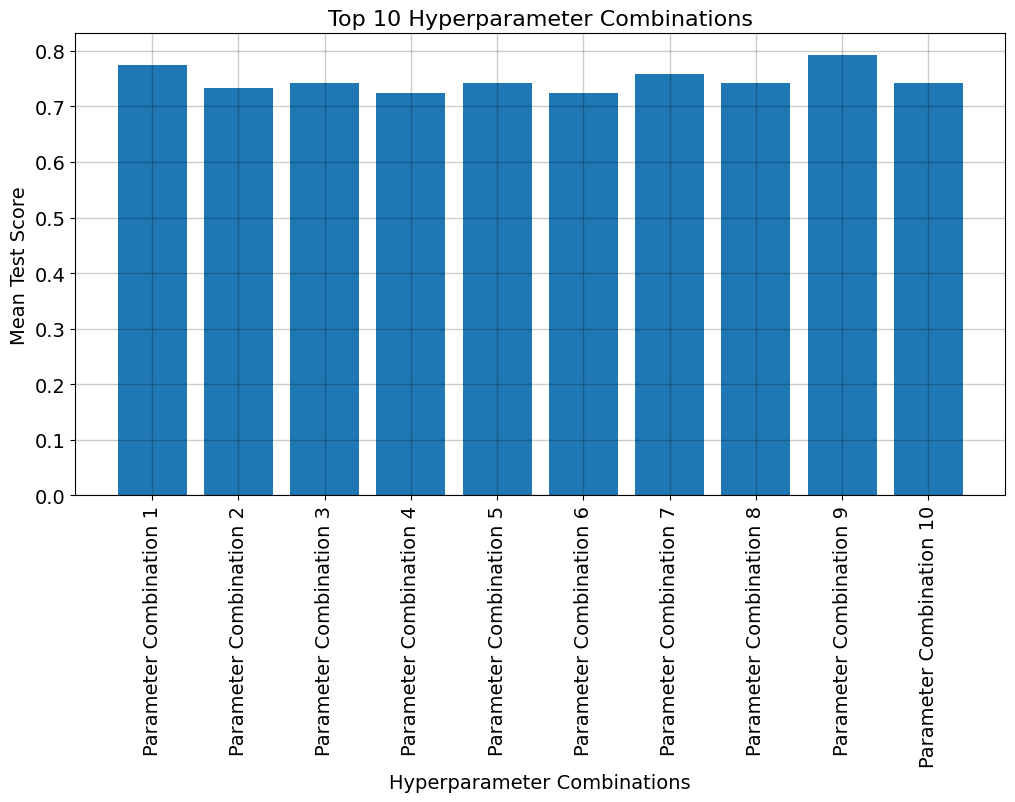

In [46]:
# Sorting by score
sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'].values[sorted_indices]
sorted_params = results['params'].values[sorted_indices]

top_params = [str(params) for params in sorted_params[:10]]
param_lb = []
for i in range(1,11):
    param_lb.append('Parameter Combination ' + str(i))

print('Top 10 Parameter Combinations:')
for i in range(len(top_params)):
    print('Parmeter Combination',i+1)
    print(top_params[i])
    print()

# Plotting the top 10 parameter combinations
plt.figure(figsize=(12, 6))
plt.bar(range(10), sorted_scores[:10], align='center')
plt.xticks(range(10), param_lb, rotation=90)
plt.xlabel('Hyperparameter Combinations', color='black', fontsize=14)
plt.ylabel('Mean Test Score', color='black', fontsize=14)
plt.title('Top 10 Hyperparameter Combinations', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

## Designing the Bagging Classifier Model with the Optimal Hyperparameters

In [47]:
best_bag_clf = halving_search.best_estimator_

# Making predictions with the best estimator
y_train_pred = best_bag_clf.predict(X_train)
y_test_pred = best_bag_clf.predict(X_test)

In [48]:
# Computing the performance metrics for the training subset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy*100,3))
print("Training Precision (in %):",round(train_precision*100,3))
print("Training Recall (in %):",round(train_recall*100,3))
print("Training F1 Score (in %):",round(train_f1*100,3))

Training Accuracy (in %): 99.625
Training Precision (in %): 99.626
Training Recall (in %): 99.625
Training F1 Score (in %): 99.625


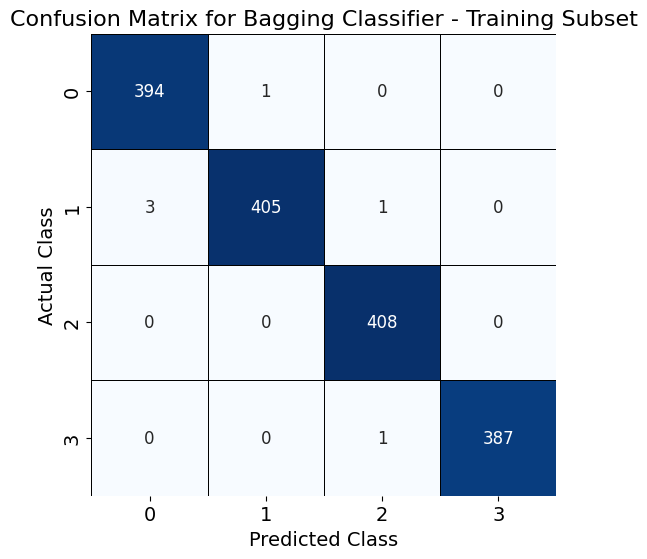

In [49]:
conf_mat_train = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_bag_clf.classes_, yticklabels=best_bag_clf.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Bagging Classifier - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

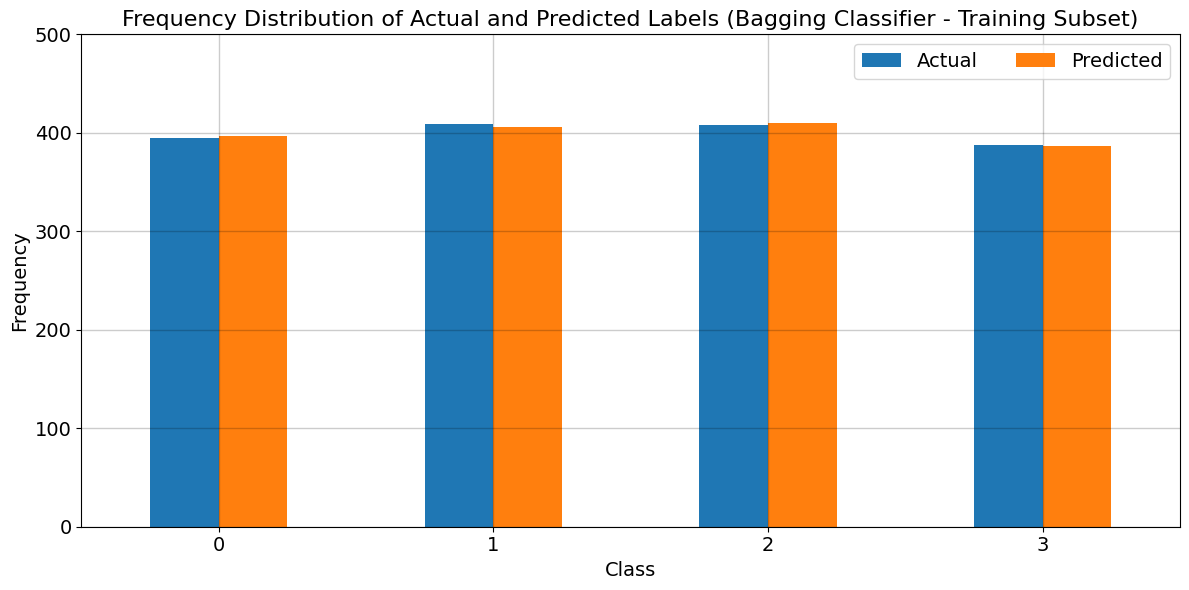

In [50]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train, predicted_counts_train = np.unique(y_train_pred, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Bagging Classifier - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5])
ax.set_ylim([0,500])
fig.tight_layout()
plt.show()

In [51]:
# Computing the performance metrics for the test subset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy*100,3))
print("Test Precision (in %):",round(test_precision*100,3))
print("Test Recall (in %):",round(test_recall*100,3))
print("Test F1 Score (in %):",round(test_f1*100,3))

Test Accuracy (in %): 90.0
Test Precision (in %): 90.227
Test Recall (in %): 90.0
Test F1 Score (in %): 90.053


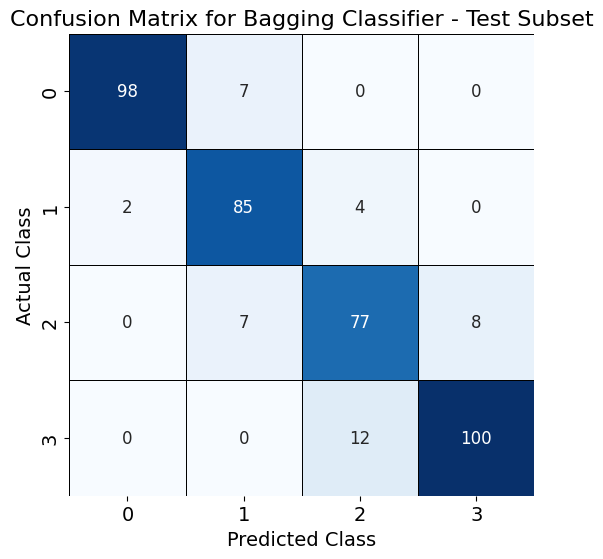

In [52]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_bag_clf.classes_, yticklabels=best_bag_clf.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Bagging Classifier - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

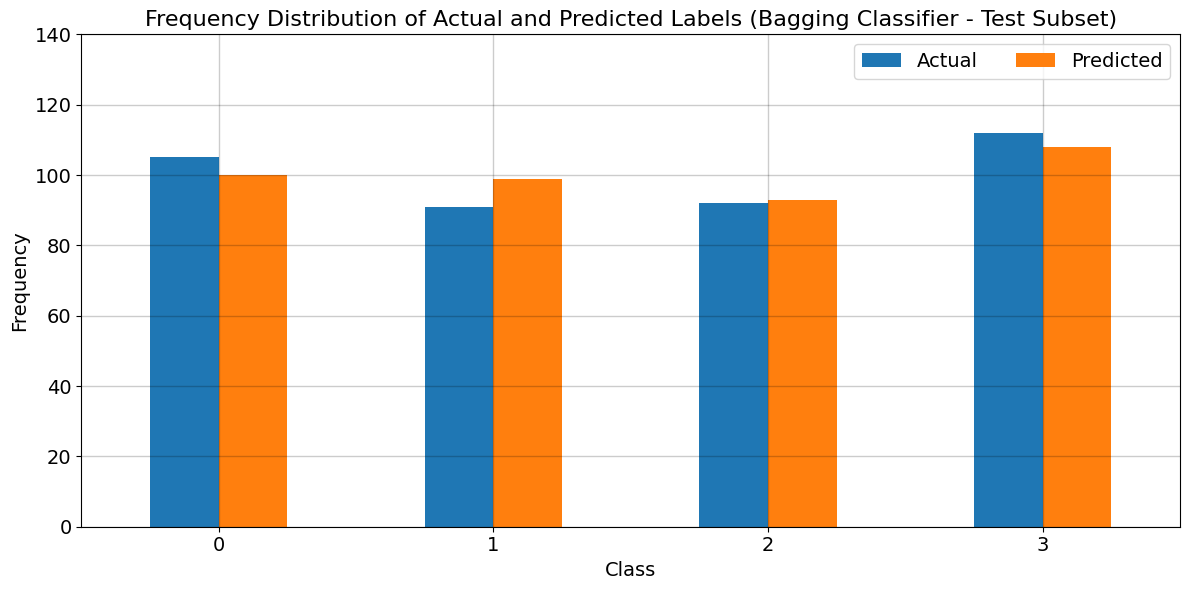

In [53]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test, predicted_counts_test = np.unique(y_test_pred, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Bagging Classifier - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5])
ax.set_ylim([0,140])
fig.tight_layout()
plt.show()

***